*Note: Before You use this Notebook make sure You have all modules installed via e.g. [PIP](https://docs.python.org/3/installing/index.html#basic-usage).*
1. requests
2. IPython.display
3. urllib
4. Pandas
5. matplotlib
6. numpy

# League of Legends 
Basic Profile Stats using [Riot Developer API](https://developer.riotgames.com): 


**Requirements:** 
1. Riot Developer API Key 
2. Ingame Name
3. Current Patch 

In [190]:
key = "RGAPI-c61d1a85-9bca-430c-8b09-d1c47b715b69"                          #Specific API Key 
params = {'api_key': key}                                                   #Parameters Object to include in Query/Header 

In [191]:
patch = '11.7.1'                                                                 #Current LoL Patch 
name  = "DarkHumor25"                                                                #LoL Account Name

In [192]:
import requests
PPath = "https://euw1.api.riotgames.com/lol/summoner/v4/summoners/by-name/" #Request URL for Profile Data  
PData = requests.get(PPath + name, params=params).json()                    #Actual Data from API-Call  

***
## Path Parameters for API

In [193]:
SummonerID = str(PData['id'])
AccountID  = str(PData['accountId'])
PUUID      = str(PData['puuid'])
print("Summoner-ID: " + SummonerID)
print("Account-ID:  " + AccountID)
print("PUUID:       " + PUUID)

Summoner-ID: Mnqc4pDLCl9tdzvwMlXyWKXHnGedPM_17cHqibbRswUMoWAq
Account-ID:  9ObJesSTXToff_Rr6ZYzKyQ5bNB904Y72MGoH879A7oI8vs
PUUID:       yNHq6iqxfOijgBYOIsbJH0z2jEhvJuUkBP5Ou8zXPYUxLKww6b0g426edYIfgSepRbguAMdhAy_qPw


***
## Profile Data

In [194]:
Level = str(PData['summonerLevel'])
ID    = str(PData['profileIconId'])
print("Summoner-Level: " + Level)
print("ProfileIcon-ID: " + ID)

Summoner-Level: 160
ProfileIcon-ID: 745


In [195]:
from IPython.core.display import display, HTML
width  = '40px'
color  = '#005180'
PName  = f"<h2 style='display:inline; position: relative; top: 10px; color: {color}'>{name}</h2>" 
PICon  = f"<img src='http://ddragon.leagueoflegends.com/cdn/{patch}/img/profileicon/{ID}.png' style='width:{width}; display: inline; position: relative; left: 25px'>"
PLevel = f"<h2 style='display:inline; position: relative; top: 12px; left: 45px; color: {color}'>{Level}</h2>"
display(HTML(PName + PICon + PLevel))

***
## Best Champions 


In [196]:
# How many champions do You wanna compare?
num = 8

In [197]:
import urllib, json 
NtoIDPath = f"http://ddragon.leagueoflegends.com/cdn/{patch}/data/en_US/champion.json"  # Name to ID Path 
NametoID = json.loads(urllib.request.urlopen(NtoIDPath).read())['data']                 # Name to ID Data 

In [198]:
CPath = "https://euw1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/"  # Path to the API Endpoint 
CData = requests.get(CPath + SummonerID, params=params).json()                                    # API Call for Champion-Data

In [199]:
# First we generate a list of the ID's of the 5 best Champions. 
ChampIDs = []                                     
for i in range(num):
    ChampIDs.append(CData[i]['championId'])  

In [200]:
# Than we load the converter from an external python file (make sure this is updated)
# %load NameToID.py
def n_id(_id):
    name_to_id = {
        1: "Annie",
        2: "Olaf",
        3: "Galio",
        4: "TwistedFate",
        5: "XinZhao",
        6: "Urgot",
        7: "LeBlanc",
        8: "Vladimir",
        9: "Fiddlesticks",
        10: "Kayle",
        11: "Master Yi",
        12: "Alistar",
        13: "Ryze",
        14: "Sion",
        15: "Sivir",
        16: "Soraka",
        17: "Teemo",
        18: "Tristana",
        19: "Warwick",
        20: "Nunu",
        21: "MissFortune",
        22: "Ashe",
        23: "Tryndamere",
        24: "Jax",
        25: "Morgana",
        26: "Zilean",
        27: "Singed",
        28: "Evelynn",
        29: "Twitch",
        30: "Karthus",
        31: "Cho'Gath",
        32: "Amumu",
        33: "Rammus",
        34: "Anivia",
        35: "Shaco",
        36: "Dr.Mundo",
        37: "Sona",
        38: "Kassadin",
        39: "Irelia",
        40: "Janna",
        41: "Gangplank",
        42: "Corki",
        43: "Karma",
        44: "Taric",
        45: "Veigar",
        48: "Trundle",
        50: "Swain",
        51: "Caitlyn",
        53: "Blitzcrank",
        54: "Malphite",
        55: "Katarina",
        56: "Nocturne",
        57: "Maokai",
        58: "Renekton",
        59: "JarvanIV",
        60: "Elise",
        61: "Orianna",
        62: "Wukong",
        63: "Brand",
        64: "LeeSin",
        67: "Vayne",
        68: "Rumble",
        69: "Cassiopeia",
        72: "Skarner",
        74: "Heimerdinger",
        75: "Nasus",
        76: "Nidalee",
        77: "Udyr",
        78: "Poppy",
        79: "Gragas",
        80: "Pantheon",
        81: "Ezreal",
        82: "Mordekaiser",
        83: "Yorick",
        84: "Akali",
        85: "Kennen",
        86: "Garen",
        89: "Leona",
        90: "Malzahar",
        91: "Talon",
        92: "Riven",
        96: "Kog'Maw",
        98: "Shen",
        99: "Lux",
        101: "Xerath",
        102: "Shyvana",
        103: "Ahri",
        104: "Graves",
        105: "Fizz",
        106: "Volibear",
        107: "Rengar",
        110: "Varus",
        111: "Nautilus",
        112: "Viktor",
        113: "Sejuani",
        114: "Fiora",
        115: "Ziggs",
        117: "Lulu",
        119: "Draven",
        120: "Hecarim",
        121: "Kha'Zix",
        122: "Darius",
        126: "Jayce",
        127: "Lissandra",
        131: "Diana",
        133: "Quinn",
        134: "Syndra",
        136: "AurelionSol",
        141: "Kayn",
        142: "Zoe",
        143: "Zyra",
        145: "Kaisa",
        150: "Gnar",
        154: "Zac",
        157: "Yasuo",
        161: "Vel'Koz",
        163: "Taliyah",
        164: "Camille",
        201: "Braum",
        202: "Jhin",
        203: "Kindred",
        222: "Jinx",
        223: "TahmKench",
        235: "Senna",
        236: "Lucian",
        238: "Zed",
        240: "Kled",
        245: "Ekko",
        246: "Qiyana",
        254: "Vi",
        266: "Aatrox",
        267: "Nami",
        268: "Azir",
        350: "Yuumi",
        412: "Thresh",
        420: "Illaoi",
        421: "Rek'Sai",
        427: "Ivern",
        429: "Kalista",
        432: "Bard",
        497: "Rakan",
        498: "Xayah",
        516: "Ornn",
        517: "Sylas",
        523: "Aphelios",
        518: "Neeko",
        555: "Pyke",
        875: "Sett",
        876: "Lillia",
    }
    return name_to_id.get(_id)

In [201]:
# With the List of IDs and the converter we can generate the respective Champ Names  
ChampNames = list(map(n_id, ChampIDs))

In [202]:
#After that we can make a dictionary with the full info of these 5 Champions. Name: {ID, Mastery, Points}
ChampInfos = {}
for i in range(num):
    ChampDict = {}

    ChampDict['ID'] = str(ChampIDs[i])
    ChampDict['Mastery'] = str(CData[i]['championLevel'])
    ChampDict['Points'] = str(CData[i]['championPoints'])

    ChampInfos[
        ChampNames[i]] = ChampDict  #Adding FullInfo Dict to another Dict

In [203]:
# Generate the HTML img tags to display them inline
CChampIcons = []

for champ in ChampNames:
    if ChampNames.index(champ) == 0: 
        Cimg = f"<img src='http://ddragon.leagueoflegends.com/cdn/{patch}/img/champion/{champ}.png' style='width:{width};display: inline; margin-right: 10px; position: relative; left: 76px; top: 7px;'>"
        CChampIcons.append(Cimg)
    else: 
        Cimg = f"<img src='http://ddragon.leagueoflegends.com/cdn/{patch}/img/champion/{champ}.png' style='width:{width};display: inline; margin-right: 10px; position: relative; left: 76px;'>"
        CChampIcons.append(Cimg)

AllIcons = ''
for item in CChampIcons:
    AllIcons += item

display(HTML(AllIcons))

In [204]:
# Dislay the data collected in ChampInfos nicely in a pandas dataframe
import pandas as pd 
df = pd.DataFrame(ChampInfos)
print(df)

        Morgana  Leona   Ashe Blitzcrank Thresh Pantheon  Amumu    Lux
ID           25     89     22         53    412       80     32     99
Mastery       7      7      5          7      7        6      5      5
Points   271759  77408  67360      56110  52735    40805  35998  29158


***
## Rank

In [205]:
# Get Rank Info from API Endpoint
# Collect Data in RankInfos Dict 
# Display Data from RankInfos Dict as Pandas Dataframe 
RPath = "https://euw1.api.riotgames.com/lol/league/v4/entries/by-summoner/"
RData = requests.get(RPath + SummonerID, params=params).json() 
RankInfos = {}
index = 0

try:
    if RData[0]['queueType'] == 'RANKED_FLEX_SR':
        index = 1
    else: 
        index = 0
        
    RQueue = RData[index]['queueType']
    RTier  = RData[index]['tier']
    RRank  = RData[index]['rank'] 
    RWins  = RData[index]['wins']
    RLoss  = RData[index]['losses']
    RWr = round(RWins/ (RWins + RLoss), 2)

    RankInfos['Rank-Type'] = RQueue 
    RankInfos['Elo'] = RTier
    RankInfos['Rank'] = RRank 
    RankInfos['Wins'] = str(RWins)
    RankInfos['Losses'] = str(RLoss)
    RankInfos['Winrate'] = str(RWr)
    df2 = pd.DataFrame(RankInfos, index=[""])
    print(df2)
except IndexError:
    print('This summoner does not seem to play any rank games.')

        Rank-Type     Elo Rank Wins Losses Winrate
  RANKED_SOLO_5x5  SILVER    I   50     49    0.51


***
## Play Rate 

In [206]:
# List of possible queue-ID's
# 420 = Ranked_5v5
# 400 = Normal Draft 5v5
# 450 = ARAM 5v5
# 1020 = Event Game (e.g. One for All)
queue = 400
begIND = 0  # 0= Last Game
endIND = 50  # 1-50

Full [Info](http://static.developer.riotgames.com/docs/lol/queues.json) of the queue-IDs.

In [207]:
params1 = {'queue': queue, 'endIndex': endIND, 'beginIndex': begIND, 'api_key': key}

In [208]:
APath = "https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/"
AData = requests.get(APath+AccountID, params=params1).json()['matches']

ACountChamps = {}
            
# Create Dict of Champions and their counts (=0)
for match in AData:
    AChamp = str(match['champion'])
    ACountChamps[AChamp] = 0

for match in AData: 
    AChamp = str(match['champion'])
    ACount = ACountChamps[AChamp] + 1
    ACountChamps[AChamp] = ACount



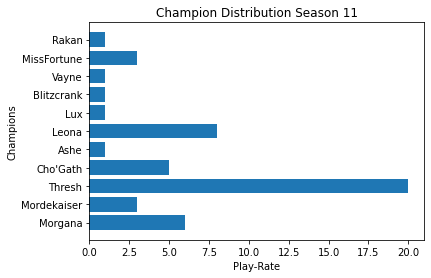

In [210]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.set_title('Champion Distribution Season 11')
ax.set_xlabel('Play-Rate')
ax.set_ylabel('Champions')

y_vals = [value for value in ACountChamps.values()]
y_champs = [n_id(int(key)) for key in ACountChamps]
y_pos = np.arange(len(y_champs)) 

plt.barh(y_champs, y_vals)
plt.show()